In [74]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%pylab inline

pd.options.display.max_columns = 50

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('train_ver2.csv')

D:\Users\zeyang\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,NaN,1,A,S,N,NaN,KHL,N,1,29,MALAGA,1,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,NaN,1,I,S,S,NaN,KHE,N,1,13,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,NaN,1,I,S,N,NaN,KHE,N,1,13,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,NaN,1,I,S,N,NaN,KHD,N,1,50,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,NaN,1,A,S,N,NaN,KHE,N,1,50,ZARAGOZA,1,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Missing data

In [6]:
null_table = pd.DataFrame({'num_null': len(data) - data.count(), 'percentage(%)': 100 * (len(data) - data.count())/len(data)})

In [7]:
null_table[null_table.num_null != 0]

,num_null,percentage(%)
ind_empleado,27734,0.203220
pais_residencia,27734,0.203220
sexo,27804,0.203732
fecha_alta,27734,0.203220
ind_nuevo,27734,0.203220
indrel,27734,0.203220
ult_fec_cli_1t,13622516,99.818330
indrel_1mes,149781,1.097513
tiprel_1mes,149781,1.097513
indresi,27734,0.203220


27734 is the most frequent number in this table, let's check if they point to the same group of people

In [8]:
interested_columns = null_table[null_table.num_null != 0].index.values.tolist()

In [9]:
data.loc[data.ind_empleado.isnull(), interested_columns].count()

ind_empleado                 0
pais_residencia              0
sexo                         0
fecha_alta                   0
ind_nuevo                    0
indrel                       0
ult_fec_cli_1t               0
indrel_1mes                  0
tiprel_1mes                  0
indresi                      0
indext                       0
conyuemp                     0
canal_entrada                0
indfall                      0
tipodom                      0
cod_prov                     0
nomprov                      0
ind_actividad_cliente        0
renta                        0
segmento                     0
ind_nomina_ult1          11888
ind_nom_pens_ult1        11888
dtype: int64

We select rows with missing ind_empleado, then we count the numebr of not null values in other columns, it turns out that except for labels ind_nomina_utl1 and ind_nom_pens_utl1, all the other columns' counts are 0, this indicates that these 27734 rows with missing ind_empleado only have null value in other columns.<br>

Given this fact and 27734 only counts for about 0.2% of data, it's safe to drop these rows.

In [10]:
data = data[pd.notnull(data.ind_empleado)]

In [11]:
null_table = pd.DataFrame({'num_null': len(data) - data.count(), 'percentage(%)': 100 * (len(data) - data.count())/len(data)})

In [12]:
null_table[null_table.num_null != 0]

,num_null,percentage(%)
sexo,70,0.000514
ult_fec_cli_1t,13594782,99.817961
indrel_1mes,122047,0.896115
tiprel_1mes,122047,0.896115
conyuemp,13617767,99.986725
canal_entrada,158392,1.162973
tipodom,1,0.000007
cod_prov,65857,0.483547
nomprov,65857,0.483547
renta,2766641,20.313710


First of all, for features with less than 1% missing data, our strategy is to drop the corresponding rows.

In [13]:
columns_to_drop = null_table[(null_table.num_null != 0) & (null_table['percentage(%)'] < 1)].index.values.tolist()

In [14]:
# Remove labels
columns_to_drop.remove('ind_nomina_ult1')
columns_to_drop.remove('ind_nom_pens_ult1')

In [15]:
columns_to_drop

['sexo', 'indrel_1mes', 'tiprel_1mes', 'tipodom', 'cod_prov', 'nomprov']

In [16]:
columns_to_drop_set = set()

In [17]:
for col in columns_to_drop:
    columns_to_drop_set.update(data[data[col].isnull()].index.values)

In [18]:
data = data.drop(list(columns_to_drop_set))

We focus on features which have more than 1% missing data.<br>

The first one is ult_fec_cli_1t<br>

##### ult_fec_cli_1t: Last date as primary customer (if he isn't at the end of the month)
According to the definition, we can know it will only be set if the customer is the Primary customer during the month but not at the end of the month. 99.9% missing vlaues mean only very small amount of people canceled their primary account at that month.<br>

After looking into the field description deeply, ult_fec_cli_1t has a strong correlation to indrel.<br>

##### 	indrel: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
If indrel is 1, ult_fec_cli_1t should be NaN value because she/he is always Primary customer, no last date as Primary customer should be set. However, if indrel is 99, then we should know when is the last date. 

In [19]:
canceled_customers = data[pd.notnull(data.ult_fec_cli_1t)]

In [20]:
canceled_customers.indrel.unique()

array([ 99.])

In [21]:
data.loc[data.ult_fec_cli_1t.isnull(), 'indrel'].unique()

array([ 1.])

Indeed, it proves our assumption about indrel and ult_fec_cli_1t. Given this information and nearly 100% of rows don't have ult_fec_cli_1t, it's safe to drop this column.

In [22]:
del data['ult_fec_cli_1t']

##### conyuemp: Spouse index. 1 if the customer is spouse of an employee

99.9% rows don't have this field set which means this column is probably not very informative. We can either drop this column or fill with the most frequent value

In [23]:
data.conyuemp.value_counts()

N    1789
S      17
Name: conyuemp, dtype: int64

In [24]:
# We assume most of customers don't have spouse working at Santander Bank
data['conyuemp'].fillna('N', inplace=True)

##### canal_entrada: channel used by the customer to join

In [25]:
data.canal_entrada.value_counts().head()

KHE    4050971
KAT    3242351
KFC    3089476
KHQ     591036
KFA     399299
Name: canal_entrada, dtype: int64

Here we will use the most frequent values to fillna.

In [26]:
data.canal_entrada.fillna('KHE', inplace=True)

##### renta: Gross income of the household

This is a very informative feature as it usually determines what financial products you can buy. We first group data by columns nomprov and sexo, then we compute the mean of income.

In [27]:
income_data = data[pd.notnull(data.renta)]

In [28]:
income_data.groupby(['nomprov', 'sexo'])['renta'].mean()

nomprov                 sexo
ALAVA                   H       111536.070000
                        V       110938.903636
ALBACETE                H        82014.508058
                        V        84110.780197
ALICANTE                H        83994.795825
                        V        89876.912760
ALMERIA                 H        86140.187147
                        V        84946.329801
ASTURIAS                H        99542.859587
                        V       103011.454191
AVILA                   H        73946.622347
                        V        79460.534194
BADAJOZ                 H        69934.437157
                        V        74500.307290
BALEARS, ILLES          H       182959.747946
                        V       164769.099130
BARCELONA               H       162857.264627
                        V       166077.527855
BIZKAIA                 H        92530.287049
                        V       122492.361000
BURGOS                  H        95468.426213
     

In [29]:
renta_data = income_data.groupby(['nomprov', 'sexo'])['renta'].mean().reset_index()

In [30]:
renta_data.head()

,nomprov,sexo,renta
0,ALAVA,H,111536.070000
1,ALAVA,V,110938.903636
2,ALBACETE,H,82014.508058
3,ALBACETE,V,84110.780197
4,ALICANTE,H,83994.795825


In [31]:
data = pd.merge(data, renta_data, how='left', on=['nomprov', 'sexo'])

Here we fill missing data with the mean income from the people in the same Province and have the same sex.<br>
##### TODO: Take age into consideration

In [32]:
data.renta_x.fillna(data.renta_y, inplace=True)

In [33]:
del data['renta_y']
data.rename(columns={'renta_x': 'renta'}, inplace=True)

##### segmento: segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

Here we naively replace NaN value with the most frequent values

##### TODO: we can impove the strategy by checking customer's age, if he/she is a young customer, it's likely that it should be categorized as 03 - college graduated

In [34]:
data.segmento.value_counts()

02 - PARTICULARES     7902964
03 - UNIVERSITARIO    4930818
01 - TOP               558401
Name: segmento, dtype: int64

In [35]:
data.segmento.fillna('02 - PARTICULARES', inplace=True)

For the missing labels ind_nomina_ult1 and ind_nom_pens_ult1, we assume they are all 0

In [36]:
data.ind_nomina_ult1.fillna(0, inplace=True)
data.ind_nom_pens_ult1.fillna(0, inplace=True)

In [37]:
len(data) - data.count()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
i

#### Done!

### Data Analysis

In [55]:
columns = {
    'fecha_dato': 'dt',
    'ncodpers': 'customer_code',
    'ind_empleado': 'employee_status',
    'pais_residencia': 'country',
    'sexo': 'sex',
    'age': 'age',
    'fecha_alta': 'first_holder_starting_dt',
    'ind_nuevo': 'nex_customer',
    'antiguedad': 'seniority',
    'indrel': 'primary',
    'ult_fec_cli_1t': 'last_date_as_primary',
    'indrel_1mes': 'customer_type',
    'tiprel_1mes': 'customer_relation',
    'indresi': 'residence_country',
    'indext': 'foreigner_country',
    'conyuemp': 'employee_spouse',
    'canal_entrada': 'channel',
    'indfall': 'deceased',
    'tipodom': 'addr_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'active',
    'renta': 'gross_income',
    'segmento': 'segmentation',
}

In [56]:
labels = """
ind_ahor_fin_ult1	Saving Account
ind_aval_fin_ult1	Guarantees
ind_cco_fin_ult1	Current Accounts
ind_cder_fin_ult1	Derivada Account
ind_cno_fin_ult1	Payroll Account
ind_ctju_fin_ult1	Junior Account
ind_ctma_fin_ult1	Más particular Account
ind_ctop_fin_ult1	particular Account
ind_ctpp_fin_ult1	particular Plus Account
ind_deco_fin_ult1	Short-term deposits
ind_deme_fin_ult1	Medium-term deposits
ind_dela_fin_ult1	Long-term deposits
ind_ecue_fin_ult1	e-account
ind_fond_fin_ult1	Funds
ind_hip_fin_ult1	Mortgage
ind_plan_fin_ult1	Pensions
ind_pres_fin_ult1	Loans
ind_reca_fin_ult1	Taxes
ind_tjcr_fin_ult1	Credit Card
ind_valo_fin_ult1	Securities
ind_viv_fin_ult1	Home Account
ind_nomina_ult1	Payroll
ind_nom_pens_ult1	Pensions
ind_recibo_ult1	Direct Debit
"""

In [58]:
for x in labels.split('\n'):
    if x:
        key, value = x.split('\t')
        value = value.replace(' ', '_')
        columns.update({key: value})

In [62]:
data.rename(columns=columns, inplace=True)

In [70]:
data.age = pd.to_numeric(data.age)
data.seniority = pd.to_numeric(data.seniority)

In [72]:
data.head(2)

,dt,customer_code,employee_status,country,sex,age,first_holder_starting_dt,nex_customer,seniority,primary,customer_type,customer_relation,residence_country,foreigner_country,employee_spouse,channel,deceased,addr_type,province_code,province_name,active,gross_income,segmentation,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,N,KHL,N,1,29,MALAGA,1,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,N,KHE,N,1,13,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Age

First, we take a look at age distribution

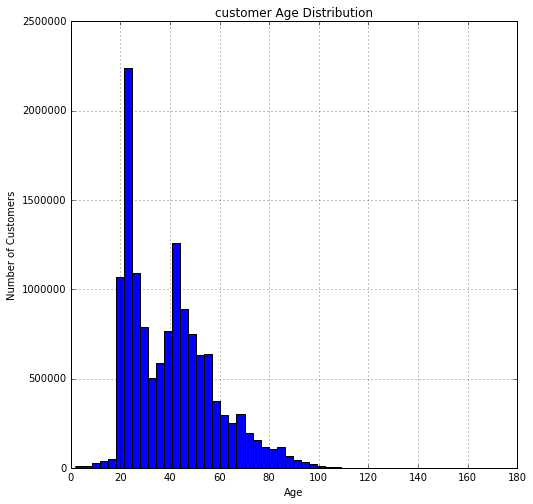

In [156]:
data['age'].hist(bins=50, figsize=(8,8))
plt.title('customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

We see there are two peaks, one is around 20 and another one is around 40.<br>

#### Age vs Gross Income

Let's take a look what's their wealth distribution.

In [123]:
gi = data.groupby(pd.cut(data['age'], np.arange(0, data['age'].max()+5, 5)))['gross_income'].mean().reset_index()
gi.dropna(how='any', inplace=True)

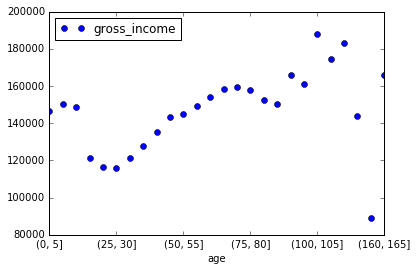

In [124]:
gi.plot(x='age', y='gross_income', style='o')

At a first glance, on average, customers under 20 years old or older than 50 years old have higher gross income than people between.

#### Age vs Products

Let's take a look the most populer products

In [136]:
pd.DataFrame({'count': data.ix[:, 23:].sum().sort_values(ascending=False),
              'percentage': data.ix[:, 23:].sum().sort_values(ascending=False)/len(data)
              })

,count,percentage
Current_Accounts,8820310,0.656683
particular_Account,1744453,0.129877
Direct_Debit,1739428,0.129503
e-account,1123774,0.083666
Payroll_Account,1101393,0.082000
Pensions,808849,0.060220
Payroll,744914,0.055460
Taxes,704950,0.052484
Credit_Card,603257,0.044913
particular_Plus_Account,588575,0.043820


Current Accounts is the most populer product, nearly 65% people bought this. Particular Account after that, accounts for about 13% people. Let's take a look at the age distribution by product.

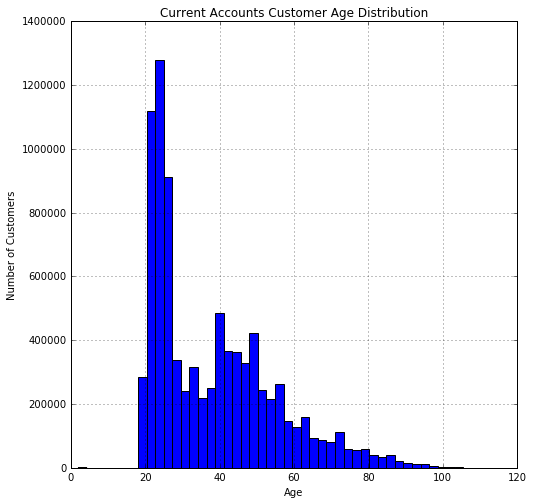

In [152]:
data.loc[data.Current_Accounts == 1, 'age'].hist(bins=50, figsize=(8, 8))
plt.title('Current Accounts Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

It almost has the same distribution as the over all age distribution, except for some outliers are gone in this graph.

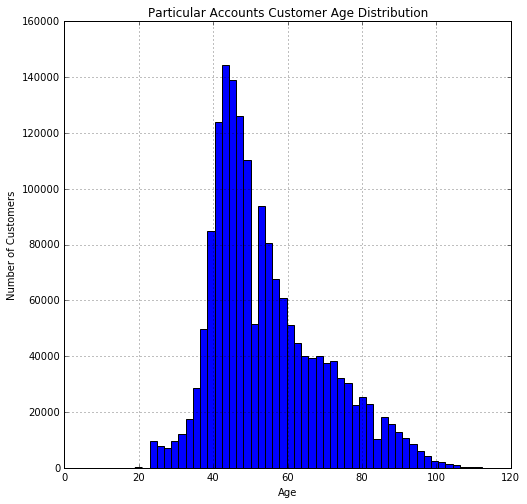

In [153]:
data.loc[data.particular_Account == 1, 'age'].hist(bins=50, figsize=(8, 8))
plt.title('Particular Accounts Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

This is very different than the previous age distributions, people around 45 years old really like this product. However, it's not that welcome to young people.<br>

Do one more Junior Account, from the title we can guess it's only for young people.

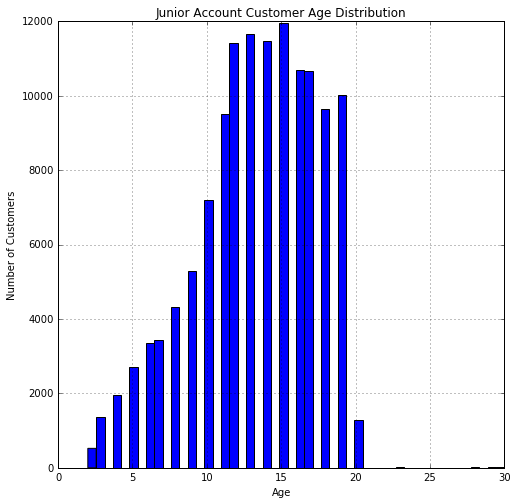

In [155]:
data.loc[data.Junior_Account == 1, 'age'].hist(bins=50, figsize=(8, 8))
plt.title('Junior Account Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

Ineed, people under 20 years old are the main buyers of this product.<br>

These different distributions indicate that customer's age does have an affect on his/her decision.<br>

When building the predition model, age is a very informative feature and we should keep an eye on it.

#### Gross Income vs Products

#### Sex vs Products